In [1]:
pip install opendp-smartnoise==0.1.4.2

  Using cached opendp_smartnoise-0.1.4.2-py3-none-any.whl (193 kB)
  Using cached opendp_smartnoise_core-0.2.3-py3-none-any.whl (12.7 MB)
  Using cached antlr4-python3-runtime-4.8.tar.gz (112 kB)
  Using cached pandasql-0.7.3.tar.gz (26 kB)
     |████████████████████████████████| 2.8 MB 6.4 MB/s eta 0:00:01
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=a5a6430ef25134dba70c716911d715f88a2cd6df053637278d4105cb3747ee29
  Stored in directory: /home/azureuser/.cache/pip/wheels/c8/d0/ab/d43c02eaddc5b9004db86950802442ad9a26f279c619e28da0
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=f11a8687c1ac974ae5499288a96adb3540d0119120892006fcab2731aff906e6
  Stored in directory: /home/azureuser/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built antlr4-python3-runtime pandasql
ERROR: azure-cli 2.44.1 has requirement antlr4-python3-runtime~=4.9.3, 

In [1]:
import pandas as pd

data_path = 'data/telco-csv.csv'
churn = pd.read_csv(data_path)
churn.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,...,tollten,equipten,cardten,wireten,loglong,logtoll,logequi,logcard,logwire,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,475.000000,386.000000,678.000000,296.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000,10.987000,2.331000,11.723100,13.274000,14.219800,13.781000,...,551.258500,465.632850,605.773750,442.736900,2.181930,3.239874,3.568135,2.854027,3.597872,3.957000
std,21.359812,12.558816,10.086681,107.044165,10.082087,1.435793,10.363486,16.902122,19.068539,14.084496,...,915.746733,857.273071,830.126069,971.471264,0.734301,0.413795,0.277567,0.557612,0.367397,0.803548
min,1.000000,18.000000,0.000000,9.000000,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.110000,1.750000,2.730000,1.010000,2.700000,2.200000
25%,17.000000,32.000000,3.000000,29.000000,3.000000,1.000000,5.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.650000,2.970000,3.370000,2.460000,3.330000,3.370000
50%,34.000000,40.000000,9.000000,47.000000,8.000000,2.000000,8.525000,0.000000,0.000000,12.000000,...,0.000000,0.000000,332.500000,0.000000,2.145000,3.210000,3.570000,2.850000,3.590000,3.850000
75%,54.000000,51.000000,18.000000,83.000000,17.000000,3.000000,14.412500,24.250000,31.475000,20.500000,...,846.900000,579.450000,910.000000,316.500000,2.670000,3.490000,3.760000,3.210000,3.860000,4.420000
max,72.000000,77.000000,55.000000,1668.000000,47.000000,8.000000,99.950000,173.000000,77.700000,109.250000,...,5916.000000,5028.650000,7515.000000,7856.850000,4.600000,5.150000,4.350000,4.690000,4.720000,7.420000


In [3]:
import opendp.smartnoise.core as sn

cols = list(churn.columns)
income_range = [0.0, 1700.0]
samples = len(churn)

with sn.Analysis() as analysis:
    # load data
    data = sn.Dataset(path=data_path, column_names=cols)
    
    # Convert income to float
    income_dt = sn.to_float(data['income'])
    
    # get mean of income
    income_mean = sn.dp_mean(data = income_dt,
                          privacy_usage = {'epsilon': .50},
                          data_lower = income_range[0],
                          data_upper = income_range[1],
                          data_rows = samples
                         )
    
analysis.release()

# print differentially private estimate of mean income
print("Private mean income:",income_mean.value)

# print actual mean income
print("Actual mean income:",churn.income.mean())

Private mean income: 81.60000000000002
Actual mean income: 77.535


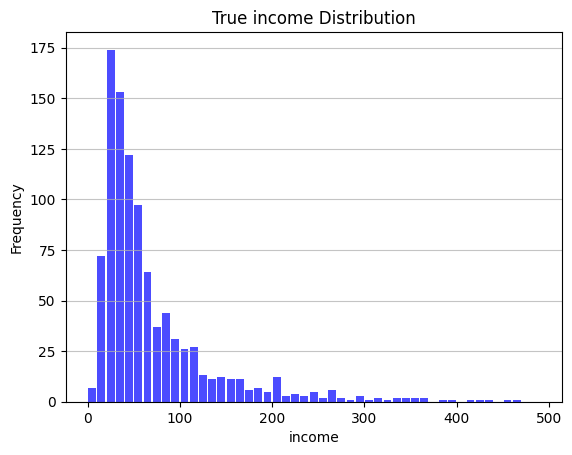

[  7  72 174 153 122  97  64  37  44  31  26  27  13  11  12  11  11   6
   7   5  12   3   4   3   5   2   6   2   1   3   1   2   1   2   2   2
   2   0   1   1   0   1   1   1   0   1   1   0   0]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

incomes = list(range(0, 500, 10))
income = churn.income

# Plot a histogram with 10-year bins
n_income, bins, patches = plt.hist(income, bins=incomes, color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('income')
plt.ylabel('Frequency')
plt.title('True income Distribution')
plt.show()
print(n_income.astype(int))

In [11]:
import matplotlib.pyplot as plt

n_in = list(n_income.astype(int))

with sn.Analysis() as analysis:
    data = sn.Dataset(path = data_path, column_names = cols)

    income_histogram = sn.dp_histogram(
            sn.to_int(data['income'], lower=0, upper=120),
            edges = incomes,
            upper = 10000,
            null_value = -1,
            privacy_usage = {'epsilon': 0.5}
        )
    
analysis.release()

plt.ylim([0,7000])
width=4
agecat_left = [x + width for x in incomes]
agecat_right = [x + 2*width for x in incomes]
plt.bar(list(range(0,500,10)), n_in, width=width, color='blue', alpha=0.7, label='True')
plt.bar(agecat_left, income_histogram.value, width=width, color='orange', alpha=0.7, label='Private')
plt.legend()
plt.title('Histogram of income')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.show()

print(income_histogram.value)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [10]:
with sn.Analysis() as analysis:
    sn_data = sn.Dataset(path = data_path, column_names = cols)

    income_ten_cov_scalar = sn.dp_covariance(
                left = sn.to_float(sn_data['income']),
                right = sn.to_float(sn_data['tenure']),
                privacy_usage = {'epsilon': 1.0},
                left_lower = 0.,
                left_upper = 120.,
                left_rows = 10000,
                right_lower = 0.,
                right_upper = 150.,
                right_rows = 10000)
analysis.release()
print('Differentially private covariance: {0}'.format(income_ten_cov_scalar.value[0][0]))
print('Actual covariance', churn.income.cov(churn.tenure))

Differentially private covariance: 10.8
Actual covariance 555.4049949949949
